In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests

In [3]:
tsla = pd.read_json('tsla.json')
musk = pd.read_json('musk.json')

In [4]:
def combine_datasets(df1, df2, shared_column):

    merged_df = pd.merge(df1, df2, on=shared_column, how='inner')
    return merged_df
combine_datasets(tsla, musk, 'Date')

KeyError: 'Date'

In [5]:
tsla.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
0,2014-01-02,9.986667,10.165333,9.770000,10.006667,92826000,55.344071,54.440118,-37.373644,15.213422,9.682107,9.820167,10.494240,9.674284,0.169472,9.740800,0.395333,0.402641,0.447550,9.970667
1,2014-01-03,10.000000,10.146000,9.906667,9.970667,70425000,53.742629,53.821521,-81.304471,17.481130,9.652800,9.826069,10.495693,9.680190,0.162623,9.776167,0.239333,0.379311,0.432677,9.800000
2,2014-01-06,10.000000,10.026667,9.682667,9.800000,80416500,46.328174,50.870410,-123.427544,-37.824708,9.629467,9.825047,10.496740,9.682577,0.141790,9.797900,0.344000,0.374267,0.426343,9.957333
3,2014-01-07,9.841333,10.026667,9.683333,9.957333,75511500,53.263037,53.406750,-84.784651,-20.779431,9.597747,9.830235,10.503407,9.688051,0.136402,9.837900,0.343334,0.369848,0.420414,10.085333
4,2014-01-08,9.923333,10.246667,9.917333,10.085333,92448000,58.368660,55.423026,60.799662,43.570559,9.573240,9.840239,10.511147,9.695964,0.140837,9.870167,0.329334,0.364060,0.413908,9.835333


In [21]:
musk.rename(columns={'Date': 'date'}, inplace=True)

In [24]:
df = pd.merge(tsla, musk, on='date')

In [25]:
df.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,...,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close,Tweet Count
0,2014-01-06,10.000000,10.026667,9.682667,9.800000,80416500,46.328174,50.870410,-123.427544,-37.824708,...,9.825047,10.496740,9.682577,0.141790,9.797900,0.344000,0.374267,0.426343,9.957333,2
1,2014-01-07,9.841333,10.026667,9.683333,9.957333,75511500,53.263037,53.406750,-84.784651,-20.779431,...,9.830235,10.503407,9.688051,0.136402,9.837900,0.343334,0.369848,0.420414,10.085333,1
2,2014-01-23,11.815333,12.158667,11.561333,12.100000,118011000,81.377569,71.893773,95.675937,112.464472,...,10.224245,10.556940,9.925292,0.551802,10.479700,0.597334,0.551808,0.523853,11.640000,1
3,2014-01-30,11.866667,12.318667,11.800667,12.189333,128475000,67.795699,65.500867,135.676579,91.117968,...,10.501614,10.580413,10.099525,0.569731,10.878933,0.636667,0.580599,0.550491,12.094000,1
4,2014-02-07,12.067333,12.442000,11.973333,12.435333,133927500,67.432967,64.506920,124.186582,164.314061,...,10.814542,10.639707,10.311282,0.503743,11.484767,0.550000,0.549203,0.543070,13.104000,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1735 entries, 0 to 1734
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1735 non-null   datetime64[ns]
 1   open            1735 non-null   float64       
 2   high            1735 non-null   float64       
 3   low             1735 non-null   float64       
 4   close           1735 non-null   float64       
 5   volume          1735 non-null   int64         
 6   rsi_7           1735 non-null   float64       
 7   rsi_14          1735 non-null   float64       
 8   cci_7           1735 non-null   float64       
 9   cci_14          1735 non-null   float64       
 10  sma_50          1735 non-null   float64       
 11  ema_50          1735 non-null   float64       
 12  sma_100         1735 non-null   float64       
 13  ema_100         1735 non-null   float64       
 14  macd            1735 non-null   float64       
 15  boll

<AxesSubplot:xlabel='Tweet Count', ylabel='volume'>

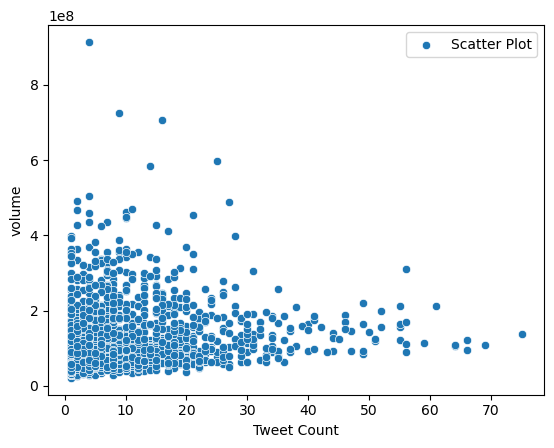

In [32]:
sns.scatterplot(data=df, x='Tweet Count', y='volume', label='Scatter Plot')

<AxesSubplot:xlabel='Tweet Count', ylabel='volume'>

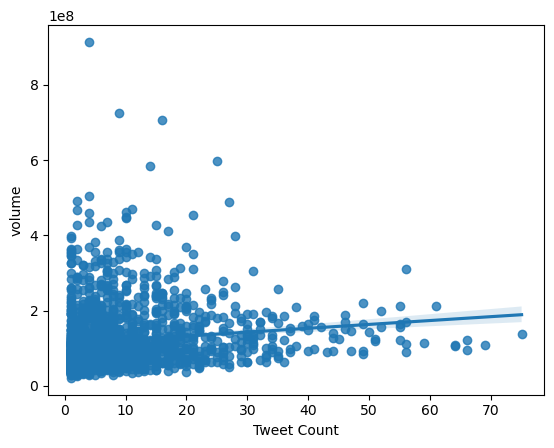

In [34]:
sns.regplot(data=df, x="Tweet Count", y="volume", label='regplot')